# Modeling the Dynamics of Love with the Runge–Kutta–Fehlberg Adaptive Step Size Method

In this notebook, we will be solving a system of linear equations using the Runge-Kutta-Fehlberg Adaptive Step Size Method, also known as, RKF45 Adaptive Step Size Method. 

The idea to model Love Dynamics was inspired from two books: 

1. Steven Strogatz's book $\textbf {Nonlinear Dynamics and Chaos with Applications to Physics, Biology, Chemistry, and Engineering}$ 

2. Sergio Rinaldi's $ \textbf {Modeling Love Dynamics}$

This Jupyter Notebook will focus on solving systems of equations in the form:

$$ R^{'} = aR+bJ $$
$$ J^{'} = cR+dJ $$

where $a$ and $d$ are defined as the person's level of self-confidence and $b$ and $c$ are the person's degree of reactiveness to his/her loved one's actions. 

The RKF45 Adaptive Step Size Method was taken from the following references:
1. Wen Shen's book $\textbf {An Introduction to Numerical Computation}$
2. Erwin Kreyszig's book $\textbf {Advanced Engineering Mathematics, 10th Edition}$

The formula, inspired from Shen, is as follows:

$$ k_1 = hf(t,x) $$
$$ k_2 = hf(t + \frac{1}{4}h, x + \frac{1}{4}k_1) $$
$$ k_3 = hf(t + \frac{3}{8}h, x + \frac{3}{32}k_1 + \frac{9}{32}k_2) $$
$$ k_4 = hf(t + \frac{12}{13}h, x + \frac{1932}{2197}k_1 - \frac{7200}{2197}k_2 + \frac{7296}{2197}k_3) $$
$$ k_5 = hf(t + h, x + \frac{439}{216}k_1 - 8k_2 + \frac{3680}{513}k_3 - \frac{845}{4104}k_4) $$

These five equations give us the recipe for the 4th order Felhberg:

$$ x(t + h) = x(t) + \frac{25}{216}k_1 + \frac{1408}{2565}k_3 + \frac{2197}{4104}k_4 - \frac{1}{5}k_5 $$

Adding in an additional term in the equations,

$$ k_6 = hf(t + \frac{1}{2}h, x - \frac{8}{27}k_1 + 2k_2 + \frac{3544}{2565}k_3 + \frac{1859}{4104}k_4 - \frac{11}{40}k_5) $$

Gives a 5th order method for the Runge-Kutta-Felhberg:

$$ x^-(t+h) =  x(t) + \frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6 $$

Finally, according Kreyszig, the error estimate can then be approximated using, 

$$ x^-(t+h) - x(t + h) \approx error $$

Using these sets of equations, we are now ready to apply the RKF45 Adaptive Step Size Method!

The adaptive step size works in the following narrative pseudocode:
1. Assign a minimum and maximum step size and minimum and maximum error. 
2. At the beginning of the loop, check if the inputted step size, $h$, is less than h_min. If yes, then let $h=h_min$. If no, check if $h > h_max$. If yes, let $h=h_max$. Else, continue with the code. 
3. Compute for RK4 and RK5 using the formula above. Let $|RK5-RK4| = error$. 
4. Check if $error > error_max$ and $h > h_min$. If yes, it means that we have taken too big a step, thus, halve the step size, $h = h/2$. If not, we continue with the process. 
5. If $error < error_min$, this means that we are not taking as big as step needed! Thus, let $h = 2h$, doubling the step and iterate once again.

Let us now apply RKF45 with Adaptive Step Size!

# Case 1

$$ R^{'} = -5R+6J $$
$$ J^{'} = 9R+4J $$

$$ R(0) = 2.0 $$
$$ J(0) = 1.5 $$

In [13]:
# Defining functions

function R_prime(t, R, J)
    return -5R + 6J
end

function J_prime(t, R, J)
    return 9R + 4J
end

J_prime (generic function with 1 method)

In [14]:
# Creating RKF45 Adaptive Step Size Function
# Since we have two variables, we will use the recipe for two variables as well

function RK45_Adaptive(t_1, t_f, N, R_0, J_0, h_0, e_min, e_max, h_min, h_max)
    #Initializing step size, error, iterations, and time t
    h = h_0
    error = 0
    n = 0
    t = t_1
    
    
    while (n < N) & (t < t_f)
        
        #Check if h is within the min and max
        if h < h_min
            h = h_min
        elseif h > h_max
            h = h_max
        end
        
        #For printing out step size
        append!(R_3, h)
        
        #RKF45 Recipe from Shen
        k1_J = h * J_prime(t_1, R_0, J_0)
        k1_R = h * R_prime(t_1, R_0, J_0)

        k2_J = h * J_prime(t_1 + h/4, R_0 + 1/4*k1_R, J_0+1/4*k1_J)
        k2_R = h * R_prime(t_1 + h/4, R_0 + 1/4*k1_R, J_0+1/4*k1_J) 

        k3_J = h * J_prime(t_1 + 3*h/8, R_0 + 3/32 * k1_R + 9/32*k2_R, J_0 + 3/32 * k1_J + 9/32*k2_J)
        k3_R = h * R_prime(t_1 + 3*h/8, R_0 + 3/32 * k1_R + 9/32*k2_R, J_0 + 3/32 * k1_J + 9/32*k2_J)

        k4_J = h * J_prime(t_1 + 12/13 * h, R_0 + 1932/2197*k1_R - 7200/2197*k2_R + 7296/2197*k3_R, J_0 + 1932/2197*k1_J - 7200/2197*k2_J + 7296/2197*k3_J)
        k4_R = h * R_prime(t_1 + 12/13 * h, R_0 + 1932/2197*k1_R - 7200/2197*k2_R + 7296/2197*k3_R, J_0 + 1932/2197*k1_J - 7200/2197*k2_J + 7296/2197*k3_J)

        k5_J = h * J_prime(t_1 + h, R_0 + 439/216 * k1_R - 8*k2_R + 3680/513 * k3_R - 845/4104 * k4_R, J_0 + 439/216 * k1_J - 8*k2_J + 3680/513 * k3_J - 845/4104 * k4_J)
        k5_R = h * R_prime(t_1 + h, R_0 + 439/216 * k1_R - 8*k2_R + 3680/513 * k3_R - 845/4104 * k4_R, J_0 + 439/216 * k1_J - 8*k2_J + 3680/513 * k3_J - 845/4104 * k4_J)

        k6_J = h * J_prime(t_1 + 1/2 * h, R_0 - 8/27 * k1_R + 2 * k2_R - 3544/2565 * k3_R + 1859/4104 *k4_R - 11/40 * k5_R, J_0 - 8/27 * k1_J + 2 * k2_J - 3544/2565 * k3_J + 1859/4104 *k4_J - 11/40 * k5_J)
        k6_R = h * R_prime(t_1 + 1/2 * h, R_0 - 8/27 * k1_R + 2 * k2_R - 3544/2565 * k3_R + 1859/4104 *k4_R - 11/40 * k5_R, J_0 - 8/27 * k1_J + 2 * k2_J - 3544/2565 * k3_J + 1859/4104 *k4_J - 11/40 * k5_J)

        J_n = J_0 + 25/216*k1_J + 1408/2565*k3_J + 2197/4104*k4_J - 1/5 * k5_J
        R_n = R_0 + 25/216*k1_R + 1408/2565*k3_R + 2197/4104*k4_R - 1/5 * k5_R

        push!(R_1, R_n)
        push!(J_1, J_n)

        J_n_2 = J_0 + 16/135 * k1_J + 6656/12825 * k3_J + 28561/56430 * k4_J - 9/50 * k5_J + 2/55 * k6_J
        R_n_2 = R_0 + 16/135 * k1_R + 6656/12825 * k3_R + 28561/56430 * k4_R - 9/50 * k5_R + 2/55 * k6_R

        push!(R_2, R_n_2)
        push!(J_2, J_n_2)
        
        #Error calculations
        error_0 = J_n_2 - J_n
        error_1 = R_n_2 - R_n
        error = abs(error_0 + error_1) / 2
        
        #Step size check
        if (error > e_max) & (h > h_min)
            h = h / 2
        else 
            J_0 = J_n_2
            R_0 = R_n_2
            n = n+1
            t = t + h
            if (error < e_min)
                h = 2*h
            end
        end
        
        push!(steps, t)
    end
end

RK45_Adaptive (generic function with 1 method)

In [15]:
#Setting up initial conditions

t_1 = 0.01
J_0 = 1.5
R_0 = 2.0
h_0 = 0.01
e_min = 10^-7
e_max = 10^-3
h_min = 0.0001
h_max = 0.1
N = 200
t_f = 25.0

R_1 = [R_0]
J_1 = [J_0]

R_2 = [R_0]
J_2 = [J_0]

R_3 = [h_0]
steps = [t_1]

#Running the function
RK45_Adaptive(t_1, t_f, N, R_0, J_0, h_0, e_min, e_max, h_min, h_max)

### Showing the Adaptive Step Size

Notice how the value of h changes as we `print(R_3)`.

In [16]:
print(R_3)

[0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005

### Step size h really adapts as shown above!

### Visualizing the Graph and Vector Field

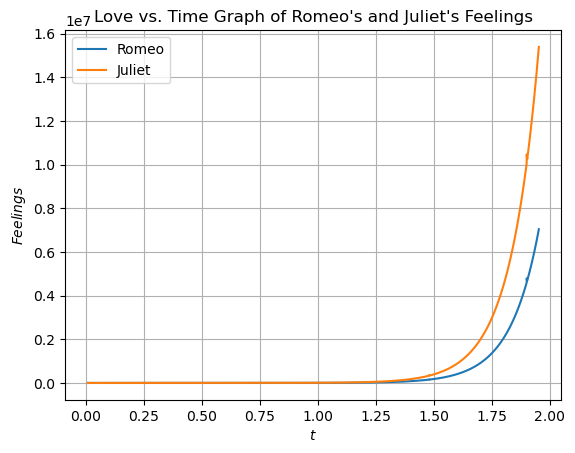

PyObject <matplotlib.legend.Legend object at 0x00000000573FF9A0>

In [17]:
using PyPlot
PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

plot(steps, R_2, label = "Romeo")
plot(steps, J_2, label = "Juliet")

PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

xlabel(L"t"); ylabel(L"$Feelings$")
legend()

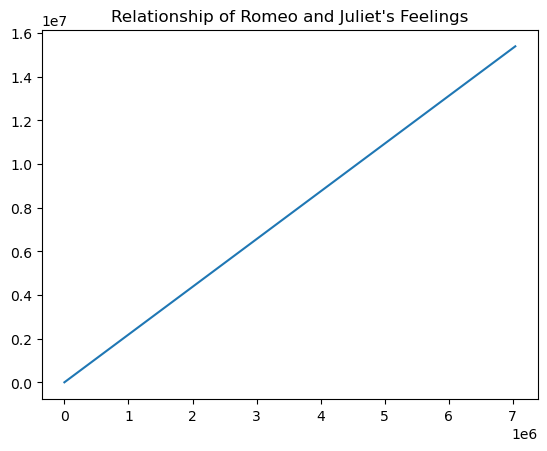

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000058519D60>

In [18]:
PyPlot.title("Relationship of Romeo and Juliet's Feelings")
plot(R_2, J_2)

In [19]:
using PyCall

In [20]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\Win10\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [23]:
X, Y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20));
U = -5*X + 6*Y;
V = 9*X + 4*Y;

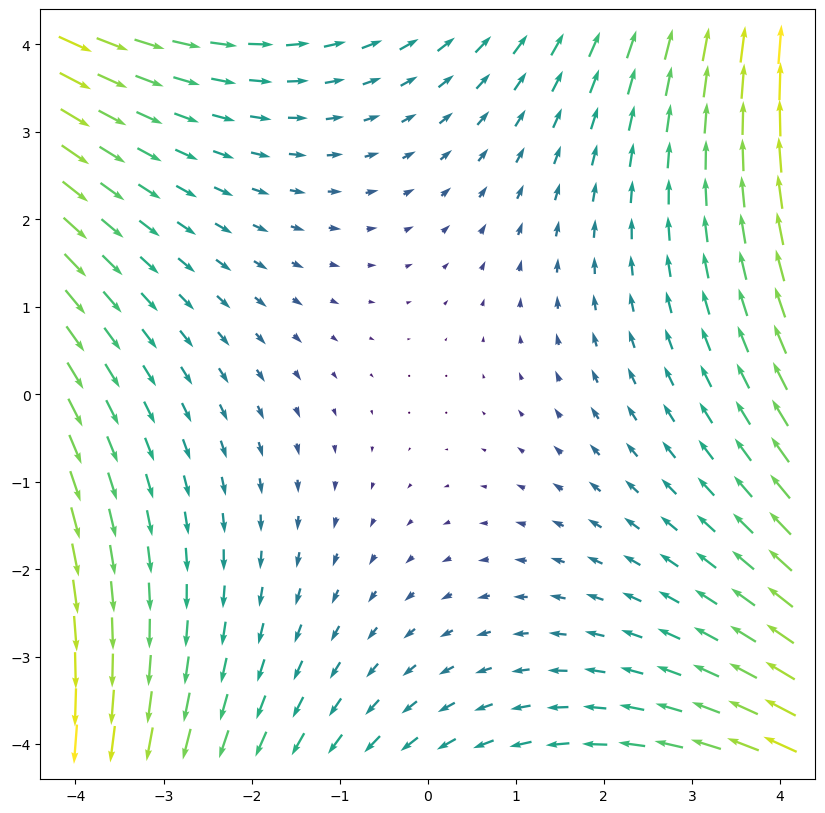

PyObject <AxesSubplot:>

In [24]:
fig = figure("pyplot_quiverplot", figsize = (10,10))
M = np.hypot(U, V)
q = quiver(X,Y,U,V, M, pivot="middle")
ax = gca()

### Explanation of Graphs Above

We see here that Romeo and Juliet's feeling will become mutual, that is, it will become an utter love fest! $ \textbf{#Sanaol} $

However, we take note that given our vector field, there is also a possibility that they will hate each other. It all depends on the initial conditions, that is, their initial state of apathy. Since we used both positives, we started with a situation that they are both in love already, hence the love fest! Had it been the other way, it would have been, without doubt, an $\textbf{utter war!}$

Also, with the adaptive step size method, we were able to reach functions values up to millions, because, the step size adjusts to the function. Had we used the RK4 method with constant step size, our function, as shown in the other notebook, will only reach up to the tens value due to a constant $h$.

# Case 2

$$ R^{'} = -5R+6J $$
$$ J^{'} = -9R+4J $$

$$ R(0) = 2.0 $$
$$ J(0) = 1.5 $$

Let's now see what happens when Romeo's partner has a low self-confidence!

In [15]:
# Defining functions

function R_prime(t, R, J)
    return -5R + 6J
end

function J_prime(t, R, J)
    return -9R + 4J
end

J_prime (generic function with 1 method)

In [16]:
t_1 = 0.01
J_0 = 1.5
R_0 = 2.0
h_0 = 0.01
e_min = 10^-7
e_max = 10^-3
h_min = 0.0001
h_max = 0.1
N = 200
t_f = 25.0

R_1 = [R_0]
J_1 = [J_0]

R_2 = [R_0]
J_2 = [J_0]

R_3 = [h_0]
steps = [t_1]

RK45_Adaptive(t_1, t_f, N, R_0, J_0, h_0, e_min, e_max, h_min, h_max)

In [17]:
#Showing adaptive Step Size
print(R_3)

[0.01, 0.01, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,

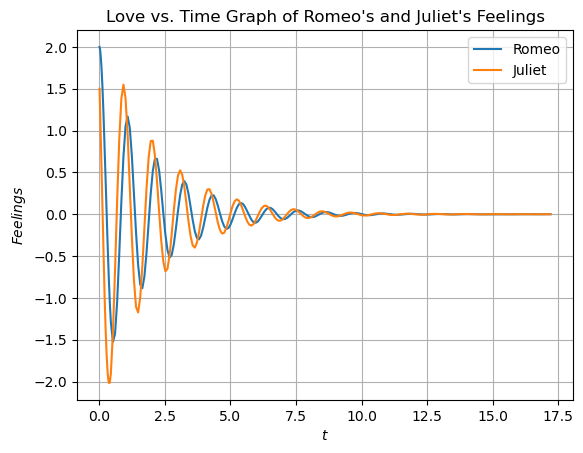

PyObject <matplotlib.legend.Legend object at 0x00000000016E2D60>

In [18]:
PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

plot(steps, R_2, label = "Romeo")
plot(steps, J_2, label = "Juliet")

PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

xlabel(L"t"); ylabel(L"$Feelings$")
legend()

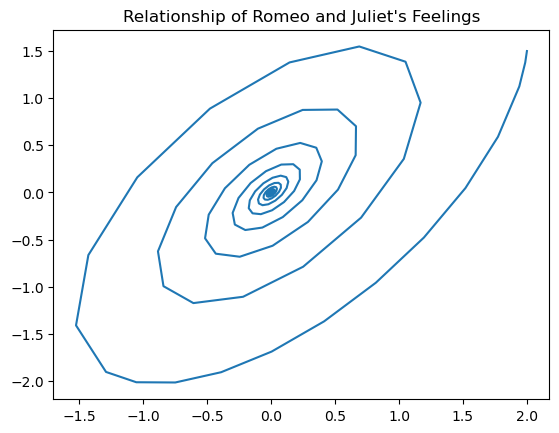

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000019D4A00>

In [19]:
PyPlot.title("Relationship of Romeo and Juliet's Feelings")
plot(R_2, J_2)

In [23]:
X, Y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20));
U = -5*X + 6*Y;
V = -9*X + 4*Y;

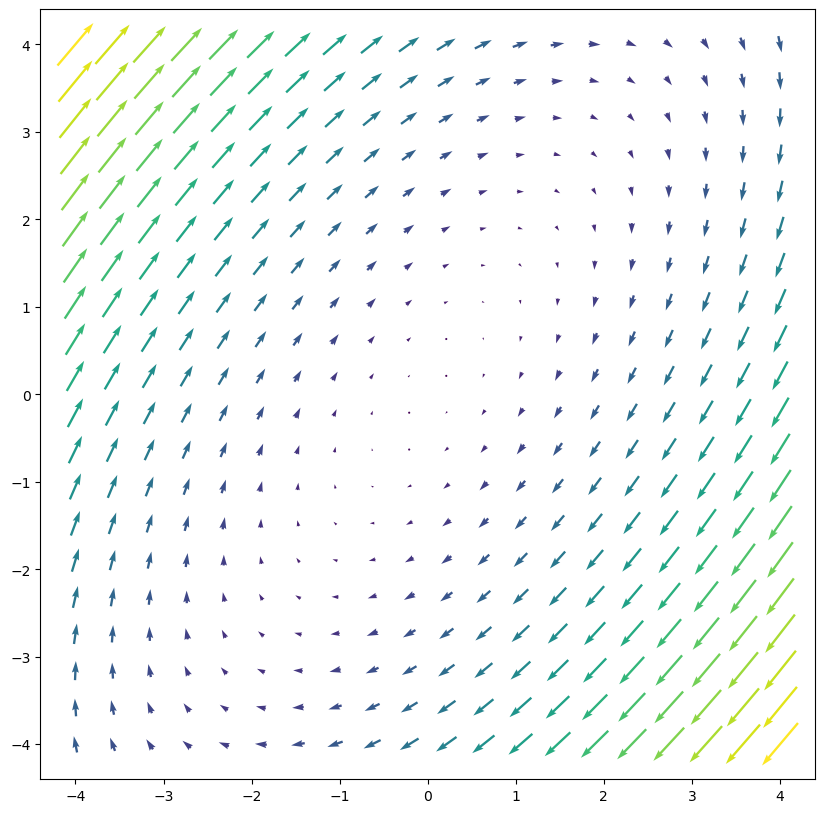

PyObject <AxesSubplot:>

In [24]:
fig = figure("pyplot_quiverplot", figsize = (10,10))
M = np.hypot(U, V)
q = quiver(X,Y,U,V, M, pivot="middle")
ax = gca()

### Explanation of Graphs Above

Looks like this time our couple will be in a constant love-hate relationship! They are times they are both in love and times when they both are out of love. We all know where this leads--$\textbf{a breakup}$.

Looks like our Romeo has to find someone with a high self-confidence instead or increase his own confidence!

# Case 3

$$ R^{'} = -5R+6J $$
$$ J^{'} = -9R-4J $$

$$ R(0) = 2.0 $$
$$ J(0) = 1.5 $$

Let's now see what happens when Romeo's partner has both a low self-confidence and low reactiveness! Exciting! How will their love story shape up?

In [14]:
# Defining functions

function R_prime(t, R, J)
    return -5R + 6J
end

function J_prime(t, R, J)
    return -9R - 4J
end

J_prime (generic function with 1 method)

In [15]:
t_1 = 0.01
J_0 = 1.5
R_0 = 2.0
h_0 = 0.01
e_min = 10^-7
e_max = 10^-3
h_min = 0.0001
h_max = 0.1
N = 200
t_f = 25.0

R_1 = [R_0]
J_1 = [J_0]

R_2 = [R_0]
J_2 = [J_0]

R_3 = [h_0]
steps = [t_1]

RK45_Adaptive(t_1, t_f, N, R_0, J_0, h_0, e_min, e_max, h_min, h_max)

In [16]:
#Showing adaptive Step Size
print(R_3)

[0.01, 0.01, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1

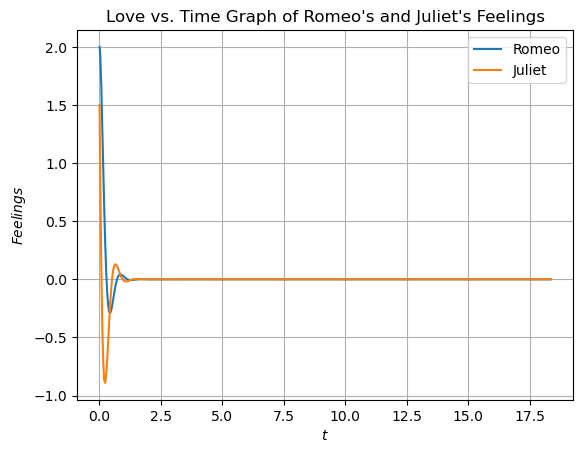

PyObject <matplotlib.legend.Legend object at 0x0000000058229A90>

In [17]:
PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

plot(steps, R_2, label = "Romeo")
plot(steps, J_2, label = "Juliet")

PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

xlabel(L"t"); ylabel(L"$Feelings$")
legend()

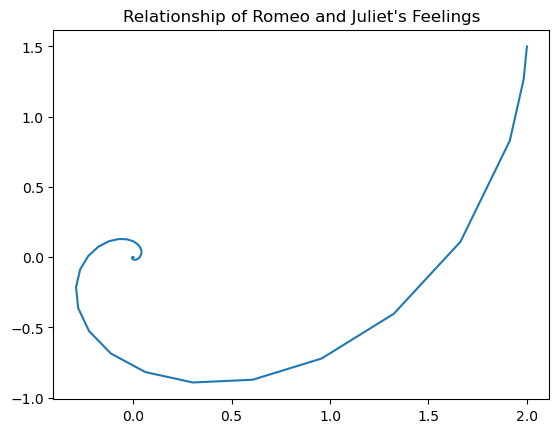

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000579B5220>

In [18]:
PyPlot.title("Relationship of Romeo and Juliet's Feelings")
plot(R_2, J_2)

In [25]:
X, Y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20));
U = -5*X + 6*Y;
V = -9*X - 4*Y;

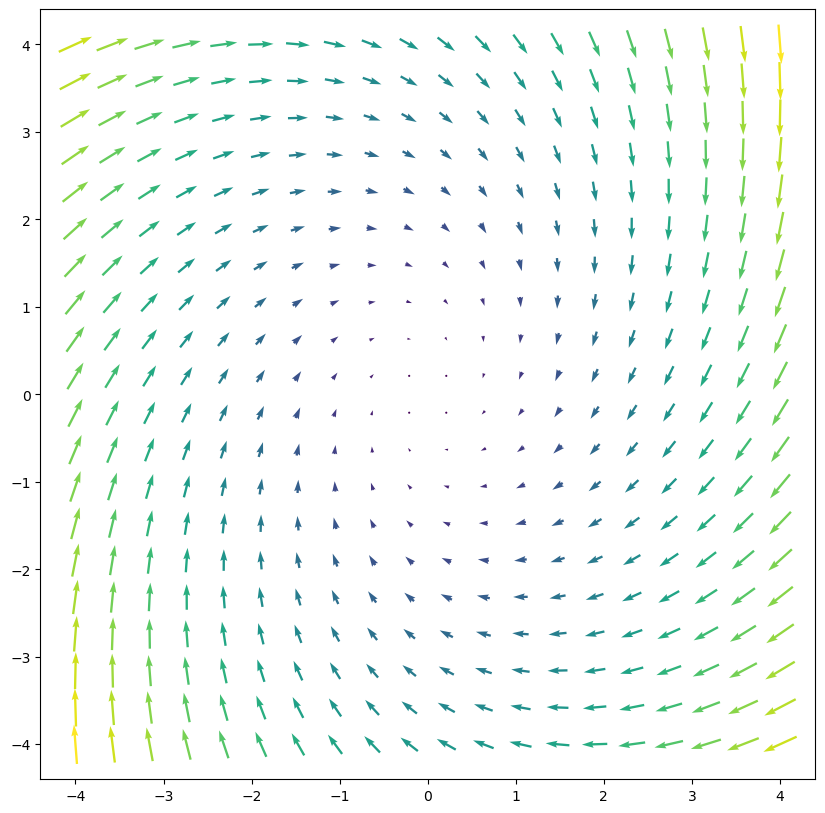

PyObject <AxesSubplot:>

In [26]:
fig = figure("pyplot_quiverplot", figsize = (10,10))
M = np.hypot(U, V)
q = quiver(X,Y,U,V, M, pivot="middle")
ax = gca()

### Explanation of Graphs Above

Looks like our Romeo still hasn't found love in this case. They may start liking each other, but the low self-confidence and low reactiveness really takes its toll in a relationship! The graphs show that this will immediately result to mutual indifference. Yikes! A $ \textbf{hopeless romantic} $ case if you ask us!

Looks like Romeo can't afford to be with those with low self-confidence and low reactiveness too. Both of them needs to be sensitive of one another for things to work out!

# Case 4

$$ R^{'} = 0R+5J $$
$$ J^{'} = -5R + 0J $$

$$ R(0) = -2.0 $$
$$ J(0) = 1.5 $$

Let's now take a look at a different case: when our two lovers depend entirely on the other's responsiveness! 

$$ \textbf {Will this be a love fest or will it be utter war?} $$

In [25]:
# Defining functions

function R_prime(t, R, J)
    return 5J
end

function J_prime(t, R, J)
    return -5R
end

J_prime (generic function with 1 method)

In [26]:
t_1 = 0.01
J_0 = 1.5
R_0 = - 2.0
h_0 = 0.01
e_min = 10^-7
e_max = 10^-3
h_min = 0.0001
h_max = 0.1
N = 200
t_f = 25.0

R_1 = [R_0]
J_1 = [J_0]

R_2 = [R_0]
J_2 = [J_0]

R_3 = [h_0]
steps = [t_1]

RK45_Adaptive(t_1, t_f, N, R_0, J_0, h_0, e_min, e_max, h_min, h_max)

In [27]:
#Showing adaptive Step Size
print(R_3)

[0.01, 0.01, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.1, 0.1, 0.1, 0.1, 0.1, 0.

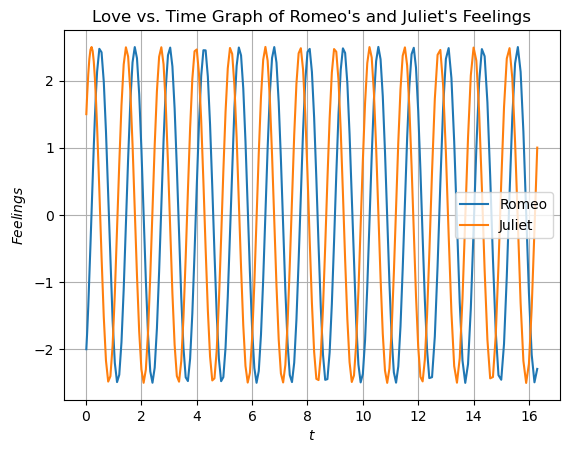

PyObject <matplotlib.legend.Legend object at 0x0000000001628DC0>

In [28]:
PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

plot(steps, R_2, label = "Romeo")
plot(steps, J_2, label = "Juliet")

PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

xlabel(L"t"); ylabel(L"$Feelings$")
legend()

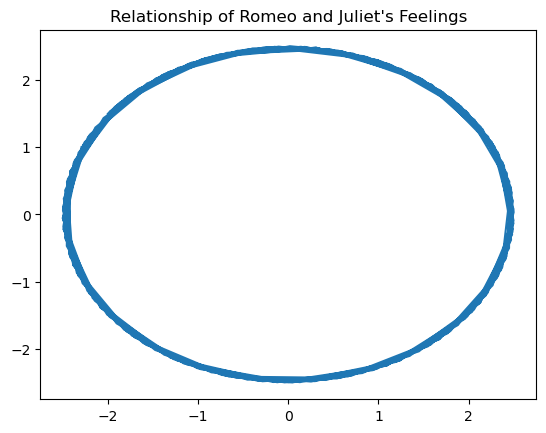

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000010CE880>

In [29]:
PyPlot.title("Relationship of Romeo and Juliet's Feelings")
plot(R_2, J_2)

In [30]:
X, Y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20));
U = 5*Y;
V = -5*X;

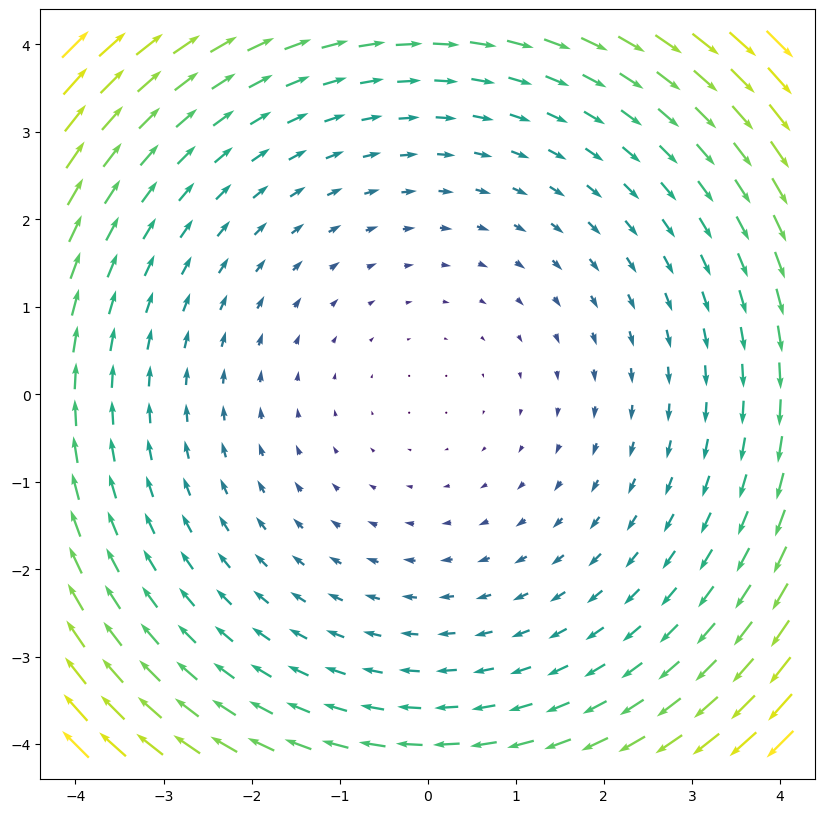

PyObject <AxesSubplot:>

In [28]:
fig = figure("pyplot_quiverplot", figsize = (10,10))
M = np.hypot(U, V)
q = quiver(X,Y,U,V, M, pivot="middle")
ax = gca()

### Explanation of Graphs Above

It's another mix of love fests and utter wars. Looks like our couple will fall in love and out of love in a constant cycle until they finally fall out of love forever. Lesson learned: $\textbf{Don't ever depend on your partner for love. Love yourself!}$


# Case 5

$$ R^{'} = 0R+5J $$
$$ J^{'} = 5R + 0J $$

$$ R(0) = -2.0 $$
$$ J(0) = 1.5 $$

Finally, we will look at when both sides react greatly to the others' actions!

$$ \textbf {Will we once again find love?} $$

In [26]:
# Defining functions

function R_prime(t, R, J)
    return 5*J
end

function J_prime(t, R, J)
    return 5*R
end

J_prime (generic function with 1 method)

In [27]:
t_1 = 0.01
J_0 = 1.5
R_0 = -2.0
h_0 = 0.01
e_min = 10^-7
e_max = 10^-3
h_min = 0.0001
h_max = 0.1
N = 200
t_f = 25.0

R_1 = [R_0]
J_1 = [J_0]

R_2 = [R_0]
J_2 = [J_0]

R_3 = [h_0]
steps = [t_1]

RK45_Adaptive(t_1, t_f, N, R_0, J_0, h_0, e_min, e_max, h_min, h_max)

In [28]:
#Showing adaptive Step Size
print(R_3)

[0.01, 0.01, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005

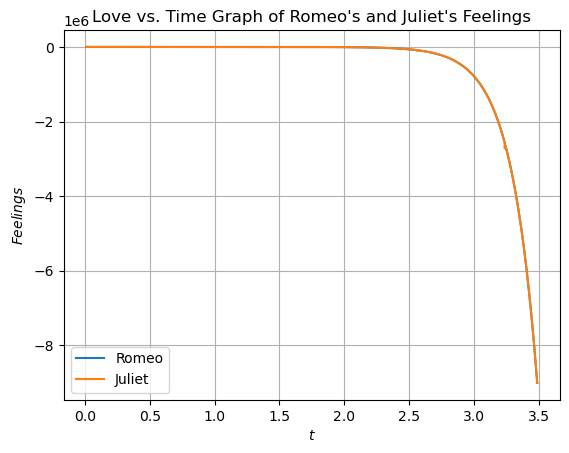

PyObject <matplotlib.legend.Legend object at 0x000000005A4C5FA0>

In [29]:
PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

plot(steps, R_2, label = "Romeo")
plot(steps, J_2, label = "Juliet")

PyPlot.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
grid("on")

xlabel(L"t"); ylabel(L"$Feelings$")
legend()

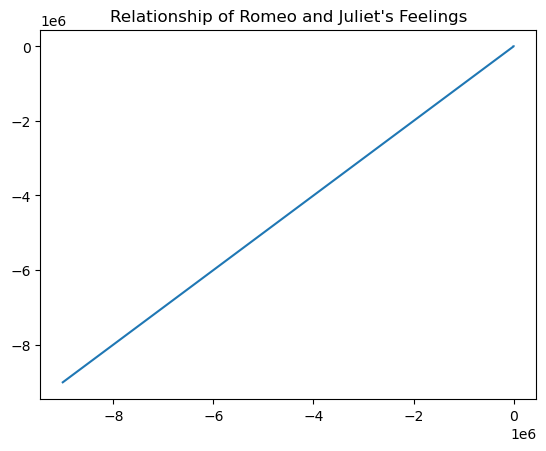

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005A5BF8E0>

In [30]:
PyPlot.title("Relationship of Romeo and Juliet's Feelings")
plot(R_2, J_2)

In [35]:
X, Y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20));
U = 5*Y;
V = 5*X;

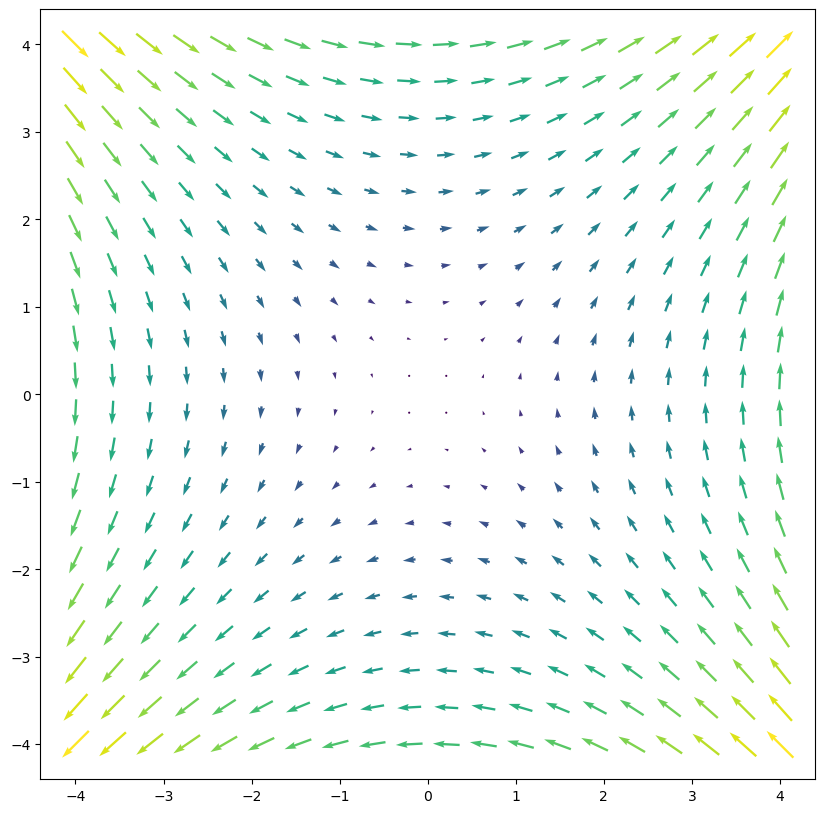

PyObject <AxesSubplot:>

In [36]:
fig = figure("pyplot_quiverplot", figsize = (10,10))
M = np.hypot(U, V)
q = quiver(X,Y,U,V, M, pivot="middle")
ax = gca()

### Explanation of Graphs Above

Since their relationship is linear, once Romeo falls in love, Julia should do too but Romeo does not like Julia and since the relationship is proportional, she ended up doing the same. Ugh! 

Oh no! Looks like our couple has failed to find love again! According to our vector field, they can either be in a lovefest or total hate of one another. It depends on how they start! Since Romeo started with a dislike for Juliet that led to their indifference. If only Romeo could have like Juliet even by a tiny bit, we would have finally found love!

Lesson learned: $\textbf{Sometimes, how we start matters too!}$

# Conclusion

Using the RKF45 Adaptive Step Size Method for solving system of Ordinary Differential Equations, we were able to simulate and model different Dynamics of Love. 

The RKF45 method also showed to be different from the RK4 with constant step size as the RKF45 methods proves to be better at allowing the model to scale to higher values due to its adaptive step size. 

All in all, this notebook has shown the capability to model one's love dynamics using numerical methods. 

# References

E. Kreyszig, Advanced Engineering Mathematics, 10th Edition. John Wiley &amp; Sons, 2010. 

S. H. Strogatz, Nonlinear dynamics and chaos: with applications to physics, biology, chemistry, and engineering. Boca Raton: CRC Press, 2019. 

S. Rinaldi, F. D. Rossa, F. Dercole, A. Gragnani, and P. Landi, Modeling love dynamics. Singapore: World Scientific, 2017. 

W. Shen, An introduction to numerical computation. New Jersey: World Scientific, 2020. 

### Documentations Used
PyCall Documentation: https://github.com/JuliaPy/PyCall.jl

Various Julia Plotting Examples using PyPlot: https://gist.github.com/gizmaa/7214002

Advanced Quiver and Quiverkey Functions: https://matplotlib.org/3.3.2/gallery/images_contours_and_fields/quiver_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-demo-py

Julia 1.5.2. Documentation: https://julialang.org/